## Regression AutoML demo with PyCaret

### 1. Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# if VS Code Pylance is marking this as unresolved import with syntax highlighting
# but the code works nonetheless, then it is because the runtime kerncel/env from conda is correct
# but VSCode PyLance is using a different python interpreter, possibly from a different conda environment
# To fix this, go to view -> Command Pallette -> Python Interpreter. 
# Change the python interpreter corresponding to this env   
from pycaret.datasets import get_data
from pycaret.regression import *

mpl.rcParams['figure.dpi'] = 300

### 2. Load dataset

In [2]:
# This downloads the insurance.csv from the location
# https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/insurance.csv
# df = get_data('insurance')

# Some name servers of ISPs, cant resolve this correctly (e.g. Jio)
# Hence the alternate way is to manually load the csv (provided locally in this project) 

In [3]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3. Mini EDA (Look for detailed EDA template later in the course)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### 3.1 Different Plots

1. Certain plots can be done directly from Pandas
2. General plots can be done from matplotlib
3. Beautiful and powerful plots can be done with Seaborn
4. Interactive plots can be done with Plotly (community edition is sufficient)
5. 3D plots can be done with mpl_toolkits.mplot3d

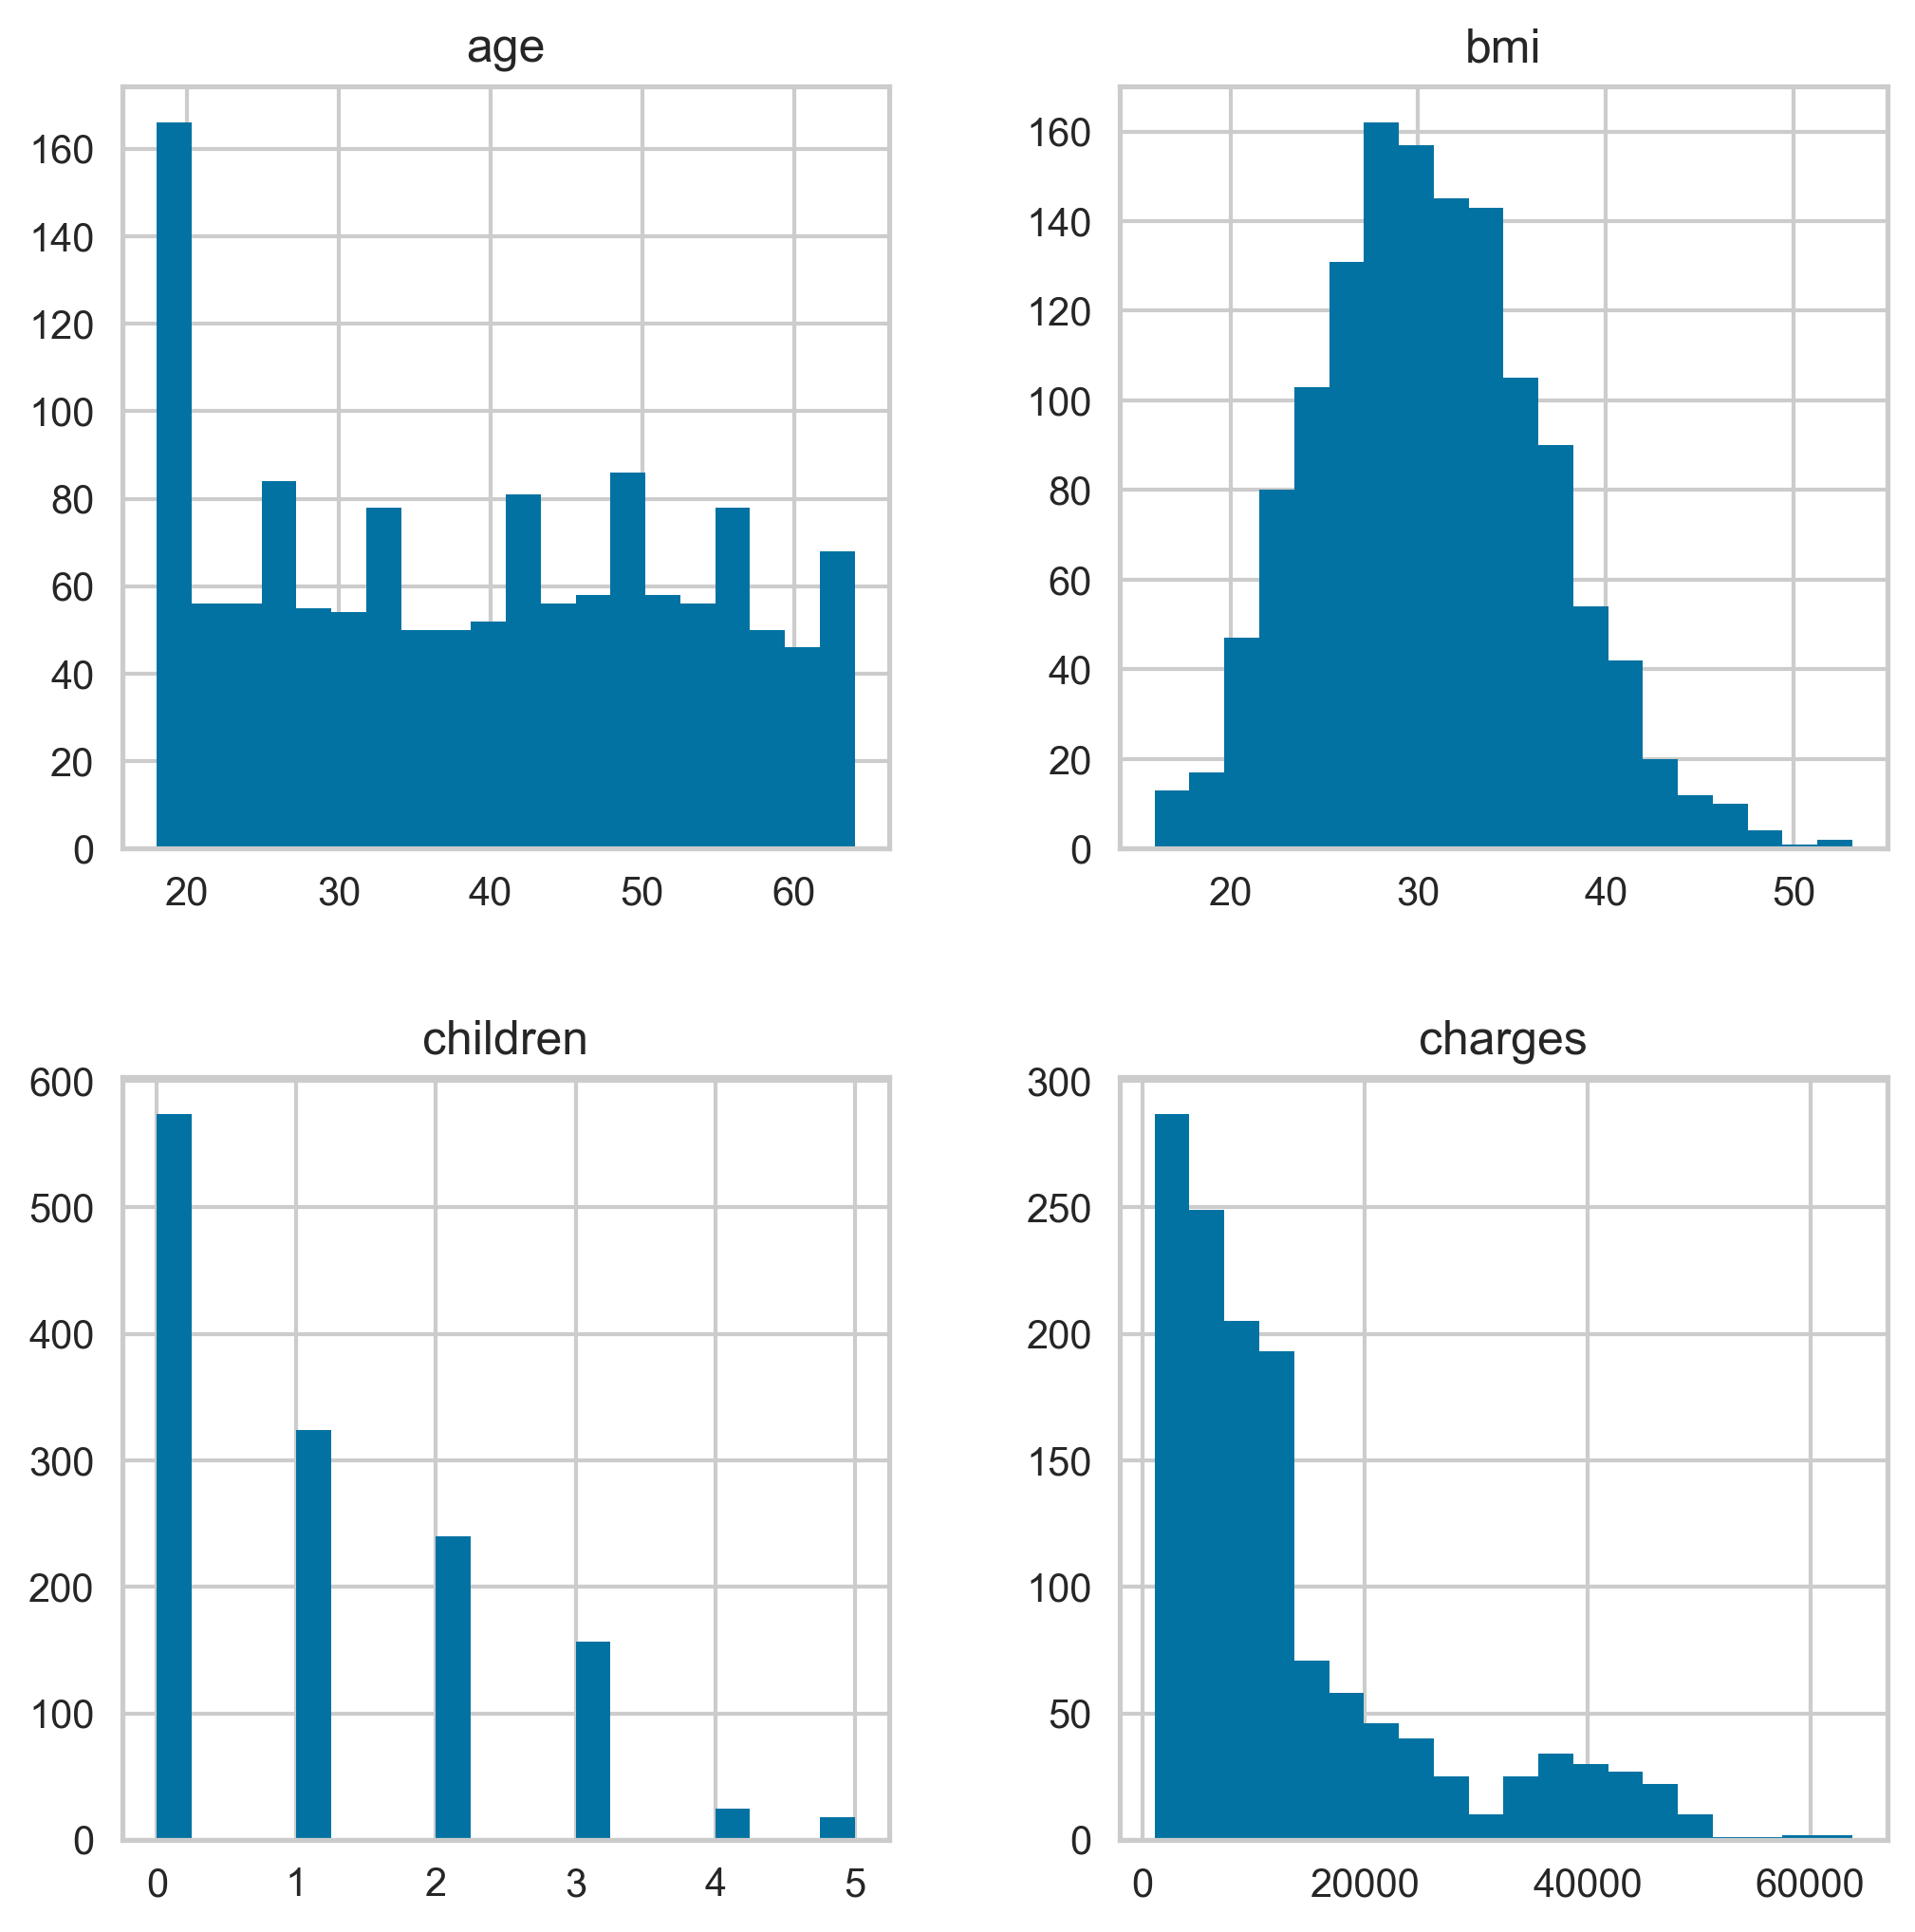

In [5]:
numeric = ['age', 'bmi', 'children', 'charges']

# using hist() on pandas for freqency histogram plot of numeric variables.
# x is the numeric field. y axis is count for that particular x 
df[numeric].hist(bins=20, figsize = (8,8))
plt.show()

##### 3.1.1 Digression: demonstration of various constructs used in subsequent code

In [6]:
# Demonstrate usage of formatted string (f string) to print for debugging
# https://note.nkmk.me/en/python-f-strings/
name_str_var = "John Smith"
age_int_var = 25
height_float_var = 185.04567891 
string_val = f"Name = {name_str_var}, Age = {age_int_var}, Height = {height_float_var:.3f}"
print(string_val)

Name = John Smith, Age = 25, Height = 185.046


In [7]:
# Demonstrate usage of numpy array flatten
array_2d = np.array([[1, 2],[3,4]])
array_2d

array([[1, 2],
       [3, 4]])

In [8]:
array_2d.flatten()

array([1, 2, 3, 4])

In [9]:
# Demonstrate usage of value_counts() to generate a frequency table
categorical = ['smoker', 'sex', 'region']
col = categorical[0]
freq_series = df[col].value_counts()

# Use print with formatted string instead of old style concatenation 
print(f"data type of freq_series={type(freq_series)}")
freq_series

data type of freq_series=<class 'pandas.core.series.Series'>


no     1064
yes     274
Name: smoker, dtype: int64

data type of axes is <class 'numpy.ndarray'>
axes shape is (2, 2)
first element in axes is Axes(0.125,0.53;0.352273x0.35)


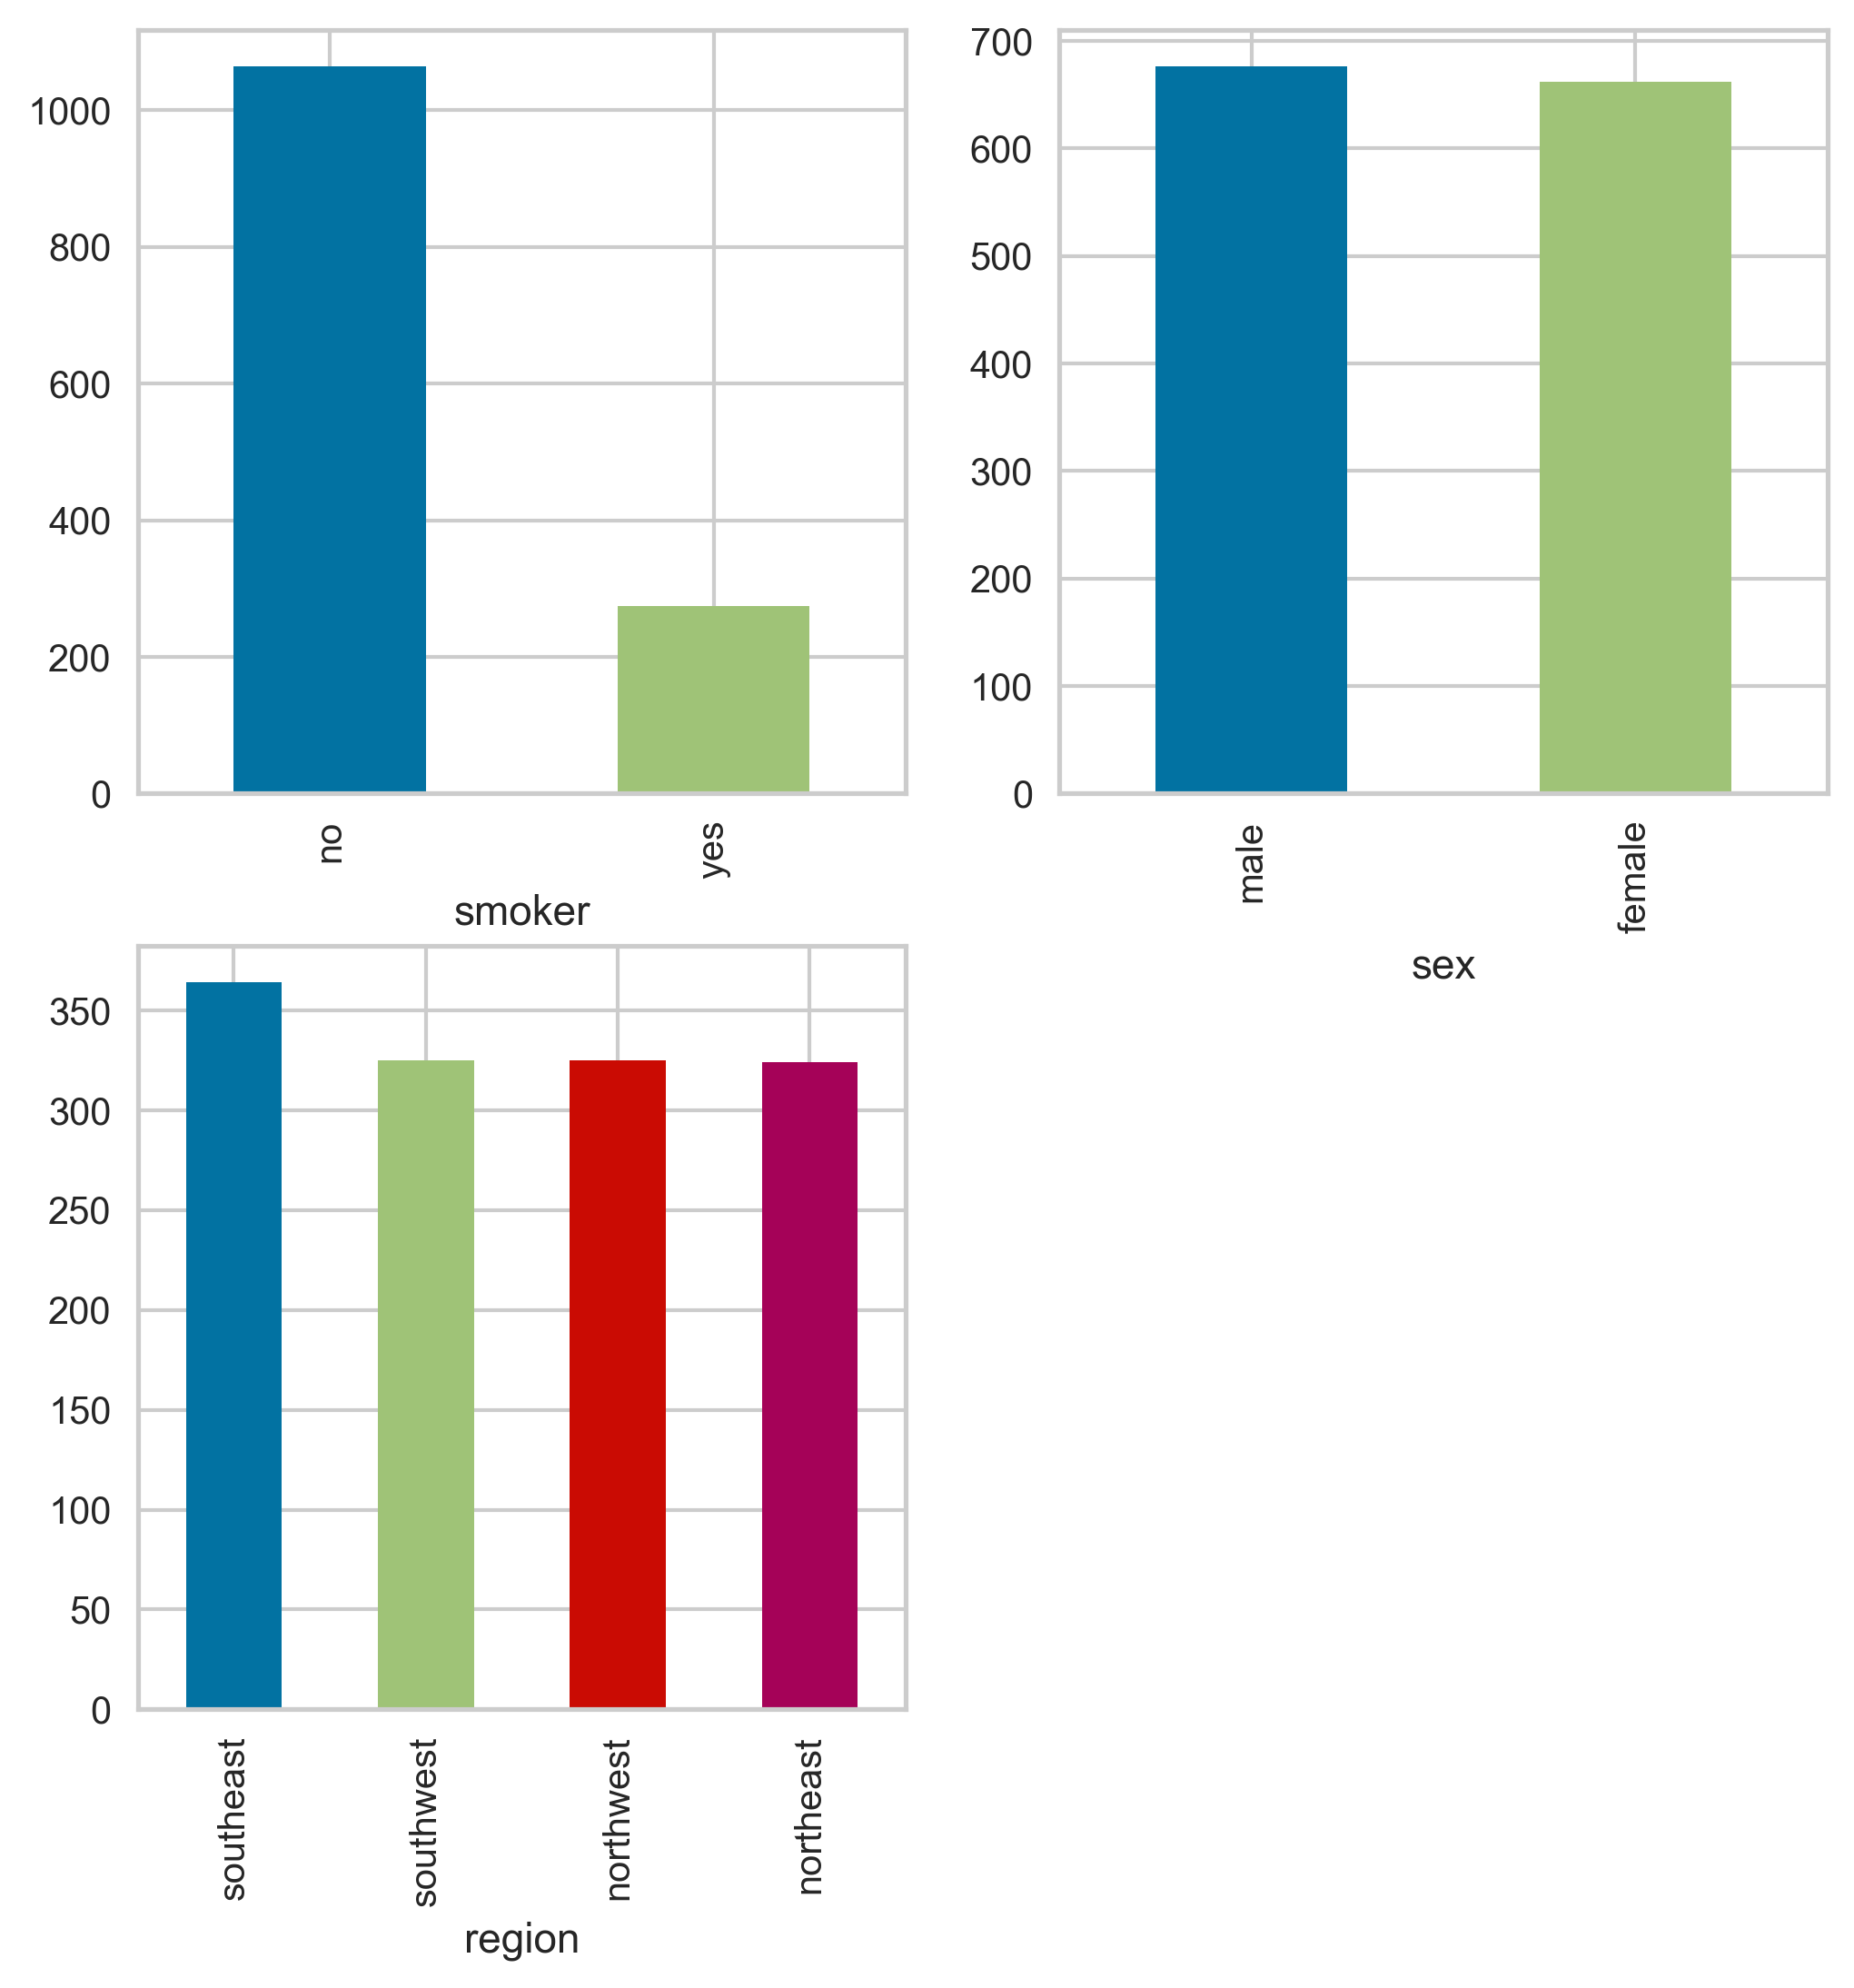

In [10]:
categorical = ['smoker', 'sex', 'region']
color = ['C0', 'C1', 'C2', 'C3']

# define how many rows and columns are needed in plot because we will be plotting one at a time here
fig, axes = plt.subplots(2, 2, figsize = (8,8)) 

# print details about the axes object
print(f"data type of axes is {type(axes)}") # axes is a ndarray
print(f"axes shape is {axes.shape}") # axes shape is 2 x 2 matrix
print(f"first element in axes is {axes[0,0]}") # axes is a ndarray

# Turn the 4th Axes object off bcoz we are plotting only 3 categorical fields
axes[1,1].set_axis_off() # comment this line to see how empty 4th axes object shows the grid lines 

for ax, col in zip(axes.flatten(), categorical) :
    df[col].value_counts().plot(kind = 'bar', ax = ax, color = color)
    ax.set_xlabel(col)

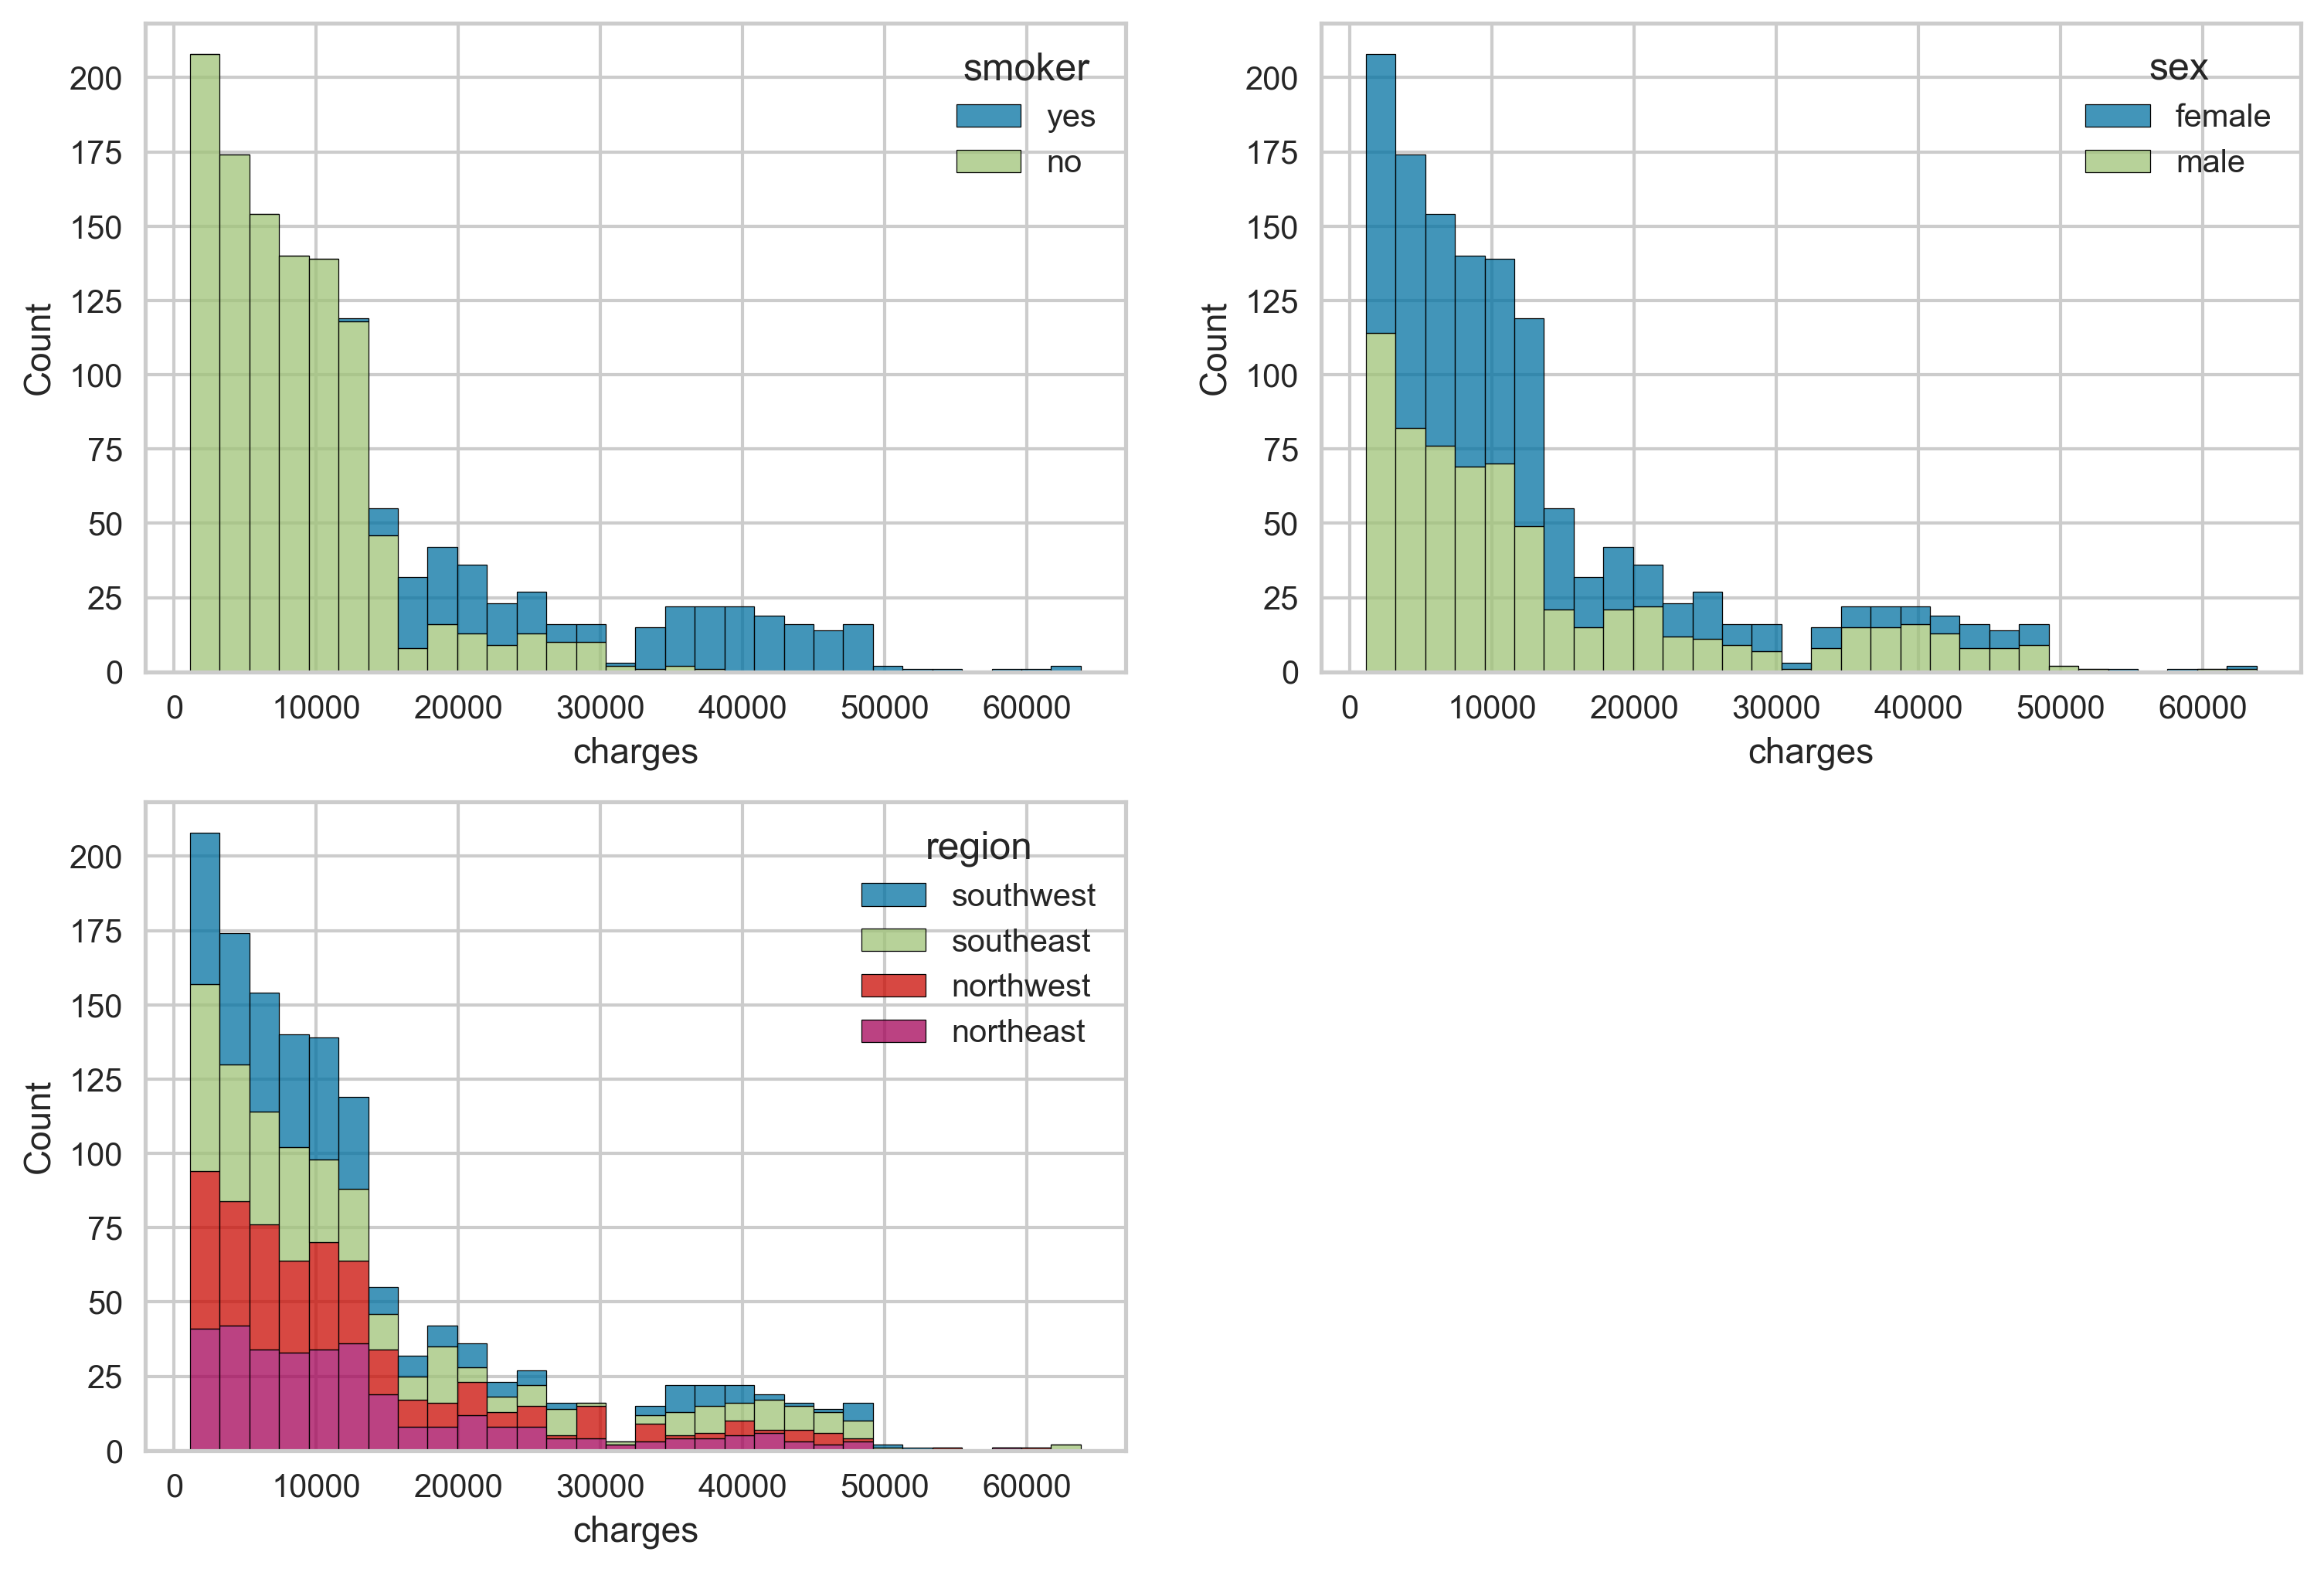

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes[1,1].set_axis_off()

for ax, col in zip(axes.flatten(), categorical):
    sns.histplot(df, x='charges', hue=col, multiple='stack', ax=ax)

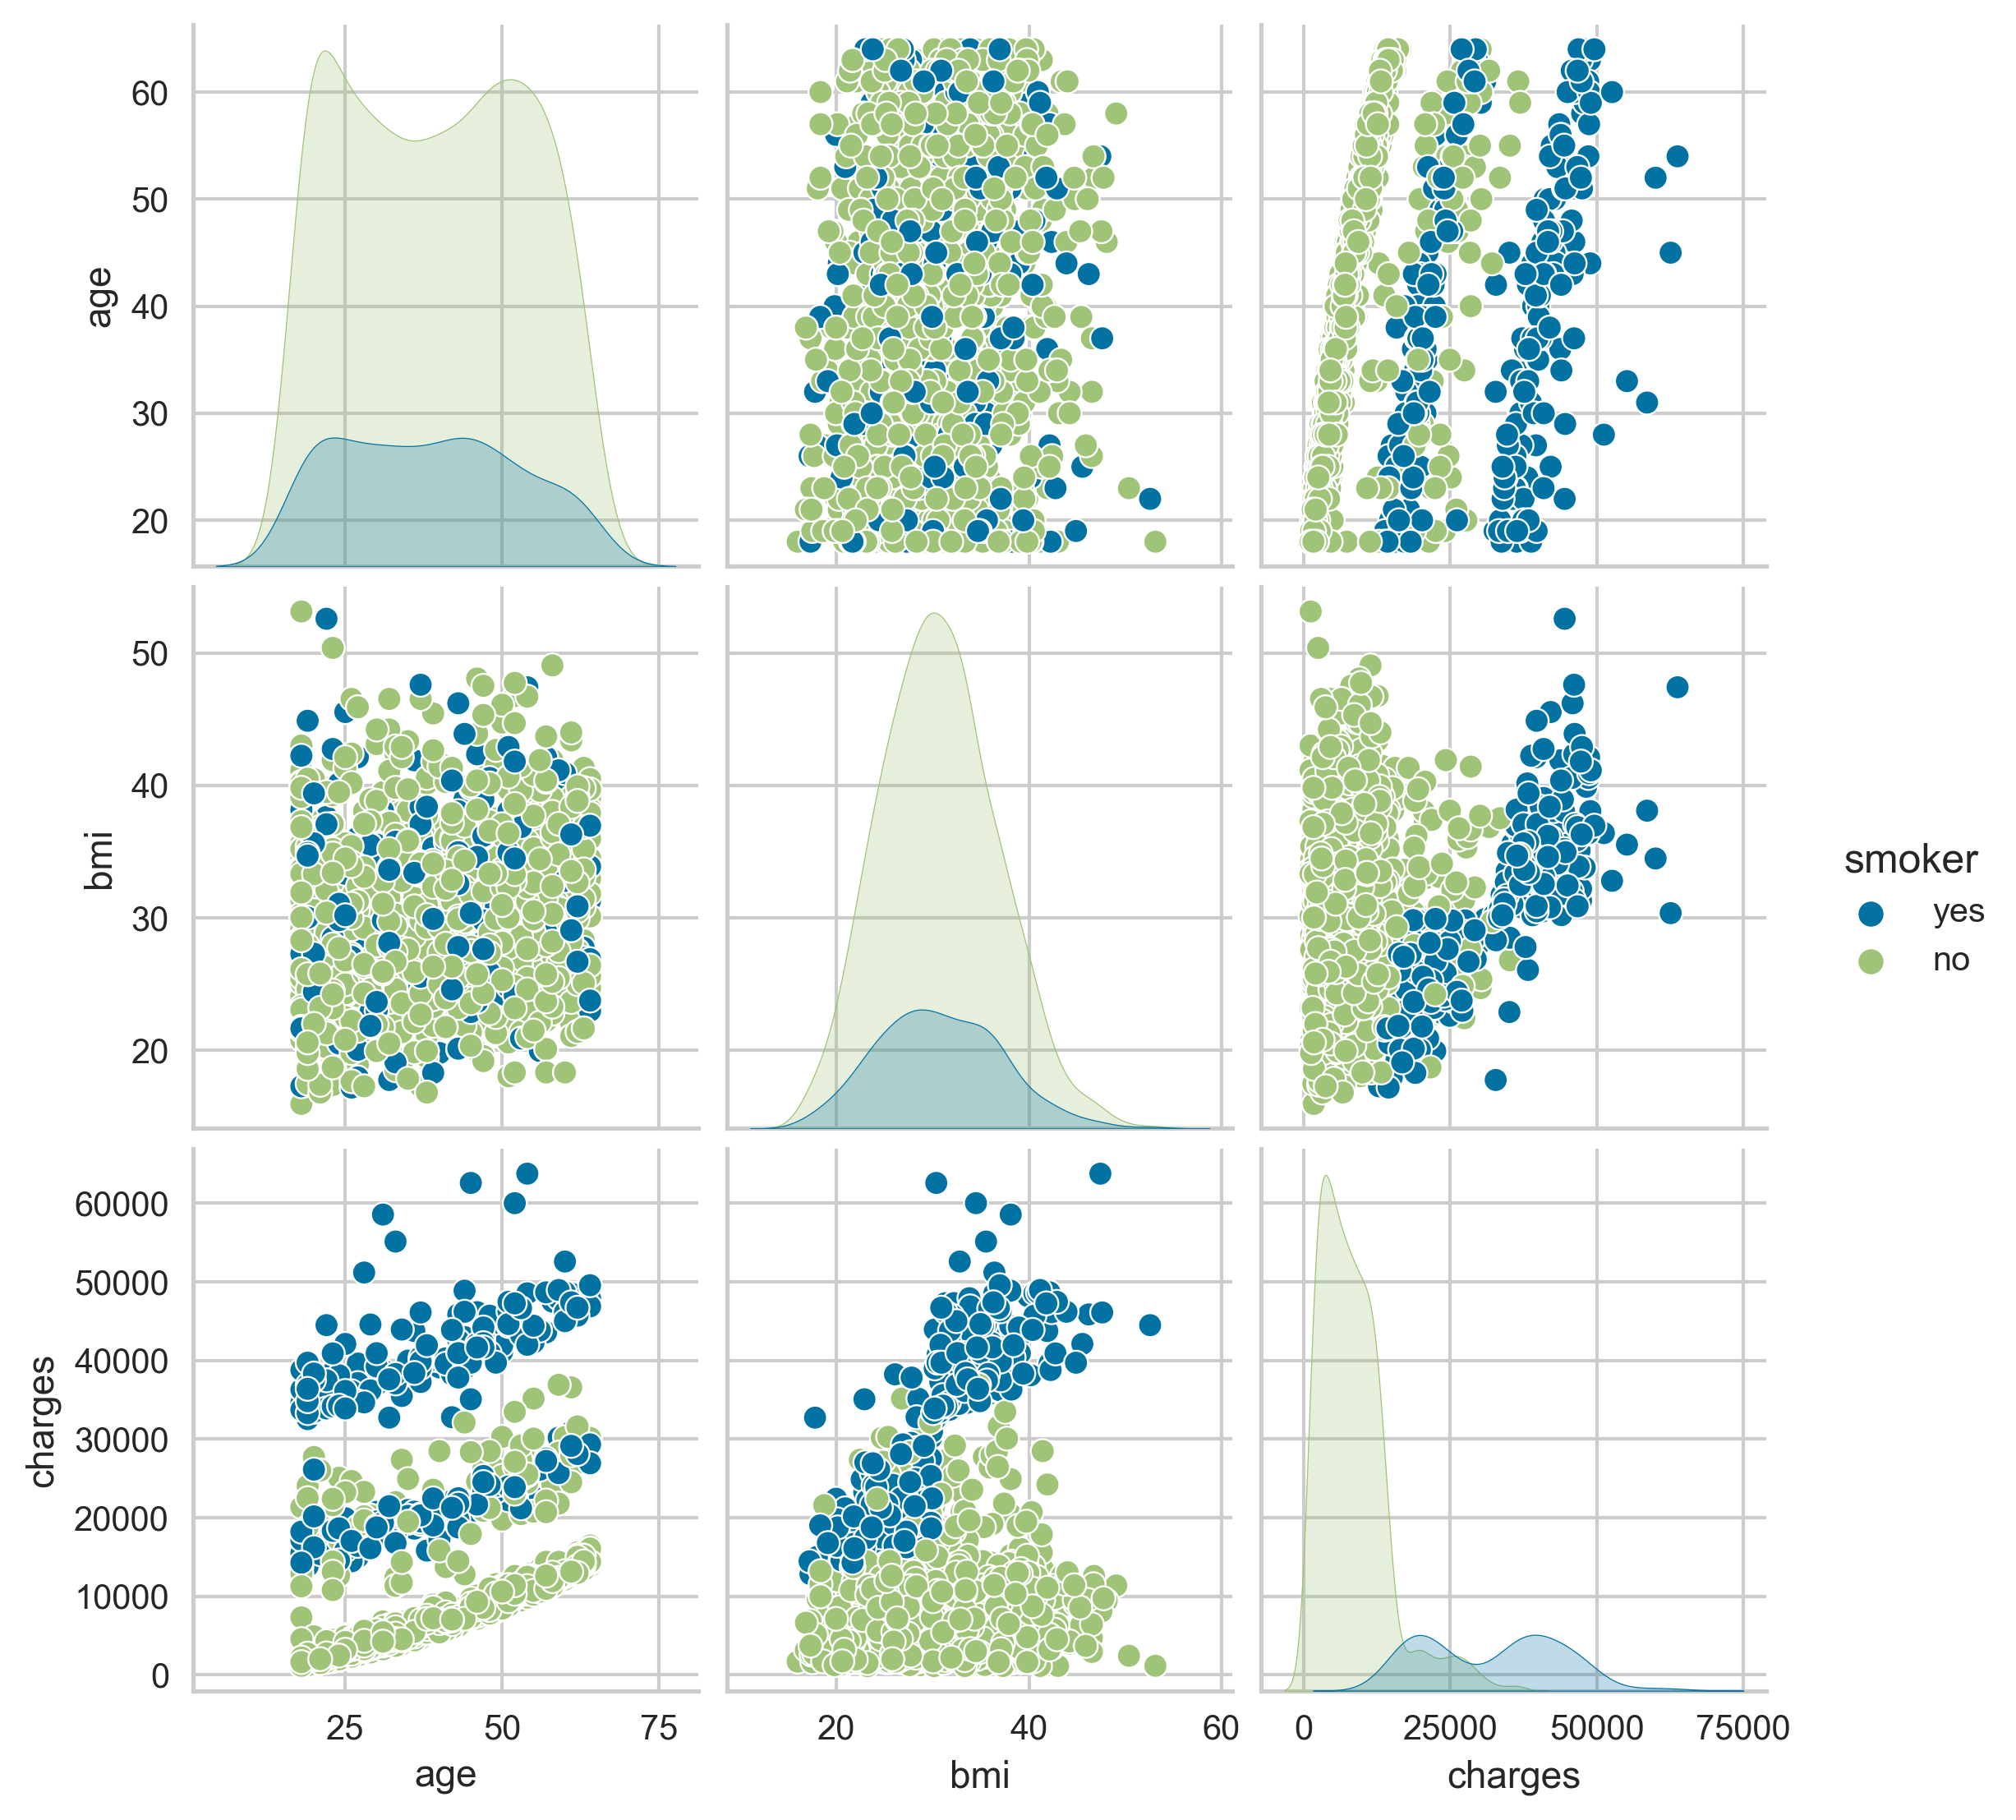

In [12]:
cols = ['age', 'bmi', 'charges', 'smoker']

sns.pairplot(df[cols], hue='smoker')
plt.show()

### 4. Initialize PyCaret environment

In [13]:
reg = setup(data=df, 
            target='charges', 
            train_size = 0.8, 
            session_id = 145,
            numeric_features = numeric[:-1], # Exclude the "charges" field contained as last item in list "numeric"  
            categorical_features = categorical,
            transformation = True, # what does this mean
            normalize = True
            ) 

In [14]:
reg

In [15]:
df_transformed = get_config('X_transformed')
df_transformed.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southwest,region_southeast
1155,-0.162169,-1.038109,-1.456902,1.355620,-0.508747,1.742910,-0.572314,-0.569436,-0.593901
575,1.286189,-1.038109,-0.536170,-1.074594,-0.508747,-0.573753,1.747292,-0.569436,-0.593901
112,-0.090278,0.963290,0.074695,-1.074594,-0.508747,-0.573753,-0.572314,1.756123,-0.593901
583,-0.457355,-1.038109,-1.169611,0.293058,-0.508747,-0.573753,-0.572314,-0.569436,1.683783
436,-1.261757,0.963290,0.225194,-1.074594,-0.508747,1.742910,-0.572314,-0.569436,-0.593901


### Comparing Regression Models

In [16]:
best_model = compare_models(sort='RMSE')
best_model

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:45:49
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2558.2673,21237218.6012,4540.4851,0.8405,0.4213,0.2906,0.0550
lightgbm,Light Gradient Boosting Machine,2787.2445,22790192.4427,4710.6093,0.8268,0.4788,0.3390,0.1110
rf,Random Forest Regressor,2668.3321,23130136.2478,4748.3683,0.8248,0.4353,0.3030,0.0790
et,Extra Trees Regressor,2750.8883,27153285.3416,5169.5985,0.7933,0.4660,0.3057,0.0760
ada,AdaBoost Regressor,4210.1813,28259731.4332,5289.5408,0.7860,0.6087,0.6854,0.0330
knn,K Neighbors Regressor,3447.1451,31314887.6000,5553.1168,0.7692,0.4740,0.3544,0.0320
lasso,Lasso Regression,4280.1197,36655386.9154,6017.3412,0.7270,0.5748,0.4429,0.2200
llar,Lasso Least Angle Regression,4280.1201,36655430.3586,6017.3459,0.7270,0.5748,0.4429,0.0280
ridge,Ridge Regression,4281.2901,36655638.6532,6017.3741,0.7271,0.5719,0.4431,0.0280
lar,Least Angle Regression,4280.3618,36656106.6721,6017.3993,0.7270,0.5759,0.4429,0.0290


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2558.2673,21237218.6012,4540.4851,0.8405,0.4213,0.2906,0.0550
lightgbm,Light Gradient Boosting Machine,2787.2445,22790192.4427,4710.6093,0.8268,0.4788,0.3390,0.1110
rf,Random Forest Regressor,2668.3321,23130136.2478,4748.3683,0.8248,0.4353,0.3030,0.0790
et,Extra Trees Regressor,2750.8883,27153285.3416,5169.5985,0.7933,0.4660,0.3057,0.0760
ada,AdaBoost Regressor,4210.1813,28259731.4332,5289.5408,0.7860,0.6087,0.6854,0.0330
knn,K Neighbors Regressor,3447.1451,31314887.6000,5553.1168,0.7692,0.4740,0.3544,0.0320
lasso,Lasso Regression,4280.1197,36655386.9154,6017.3412,0.7270,0.5748,0.4429,0.2200
llar,Lasso Least Angle Regression,4280.1201,36655430.3586,6017.3459,0.7270,0.5748,0.4429,0.0280
ridge,Ridge Regression,4281.2901,36655638.6532,6017.3741,0.7271,0.5719,0.4431,0.0280
lar,Least Angle Regression,4280.3618,36656106.6721,6017.3993,0.7270,0.5759,0.4429,0.0290


GradientBoostingRegressor(random_state=145)

### Creating the Model

In [17]:
model = create_model('gbr', fold = 10)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:46:04
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2830.1958,26449405.5343,5142.8986,0.8187,0.5701,0.2727
1,2792.4045,26083362.3385,5107.1873,0.8704,0.4040,0.2543
2,2154.0712,12121961.0054,3481.6607,0.8795,0.3818,0.3434
3,2832.0608,27620036.8138,5255.4768,0.6915,0.4437,0.3117
4,2473.8481,20948380.7266,4576.9401,0.8695,0.4359,0.3060
5,2172.3404,13689537.4826,3699.9375,0.8838,0.3915,0.2166
6,2918.9165,28784983.8661,5365.1639,0.8032,0.4212,0.3042
7,2531.8543,21021006.4464,4584.8671,0.8224,0.3930,0.2684
8,2076.8673,9414654.5353,3068.3309,0.9426,0.3180,0.2888


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tuning the Model

In [18]:
params = {
        'learning_rate': [0.05, 0.08, 0.1],
        'max_depth': [1,2, 3, 4, 5, 6, 7, 8],
        'subsample': [0.8, 0.9, 1, 1.1],
        'n_estimators' : [100, 200, 300, 400, 500]
    }

tuned_model = tune_model(model, optimize = 'RMSE', fold = 10,
                       custom_grid = params, n_iter = 100)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:46:05
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2883.5959,25562339.3715,5055.9212,0.8248,0.5367,0.3089
1,2820.7041,25064998.8890,5006.4957,0.8754,0.3895,0.2671
2,2046.4345,10074374.7220,3174.0156,0.8999,0.3639,0.3384
3,2793.3922,27251056.6603,5220.2545,0.6956,0.4511,0.3248
4,2484.3220,20972553.8443,4579.5801,0.8694,0.4469,0.3271
5,2038.1330,11419084.9567,3379.2137,0.9031,0.3702,0.2252
6,2807.6042,27392612.6282,5233.7952,0.8127,0.4048,0.3043
7,2564.2782,20544412.1414,4532.5944,0.8265,0.3953,0.2890
8,1918.6837,8169714.9423,2858.2713,0.9502,0.3142,0.2814


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2883.5959,25562339.3715,5055.9212,0.8248,0.5367,0.3089
1,2820.7041,25064998.8890,5006.4957,0.8754,0.3895,0.2671
2,2046.4345,10074374.7220,3174.0156,0.8999,0.3639,0.3384
3,2793.3922,27251056.6603,5220.2545,0.6956,0.4511,0.3248
4,2484.3220,20972553.8443,4579.5801,0.8694,0.4469,0.3271
5,2038.1330,11419084.9567,3379.2137,0.9031,0.3702,0.2252
6,2807.6042,27392612.6282,5233.7952,0.8127,0.4048,0.3043
7,2564.2782,20544412.1414,4532.5944,0.8265,0.3953,0.2890
8,1918.6837,8169714.9423,2858.2713,0.9502,0.3142,0.2814


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


### Making Predictions

In [19]:
predictions = predict_model(model)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2578.9802,21985056.1153,4688.8225,0.8685,0.4177,0.2920


,age,sex,bmi,children,smoker,region,charges,prediction_label
786,60,male,36.955002,0,no,northeast,12741.166992,14856.882087
1006,28,male,29.260000,2,no,northeast,4438.263184,7269.664510
1177,40,female,27.400000,1,no,southwest,6496.886230,7747.540313
57,18,male,31.680000,2,yes,southeast,34303.167969,34709.724202
317,54,male,32.775002,0,no,northeast,10435.065430,12343.655858


In [20]:
predictions2 = predict_model(tuned_model)
predictions2.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2529.2879,21059741.7049,4589.0894,0.8740,0.4045,0.2900


,age,sex,bmi,children,smoker,region,charges,prediction_label
786,60,male,36.955002,0,no,northeast,12741.166992,14808.050914
1006,28,male,29.260000,2,no,northeast,4438.263184,7427.120294
1177,40,female,27.400000,1,no,southwest,6496.886230,7532.987179
57,18,male,31.680000,2,yes,southeast,34303.167969,35421.236932
317,54,male,32.775002,0,no,northeast,10435.065430,12337.094389


### Plotting the Model

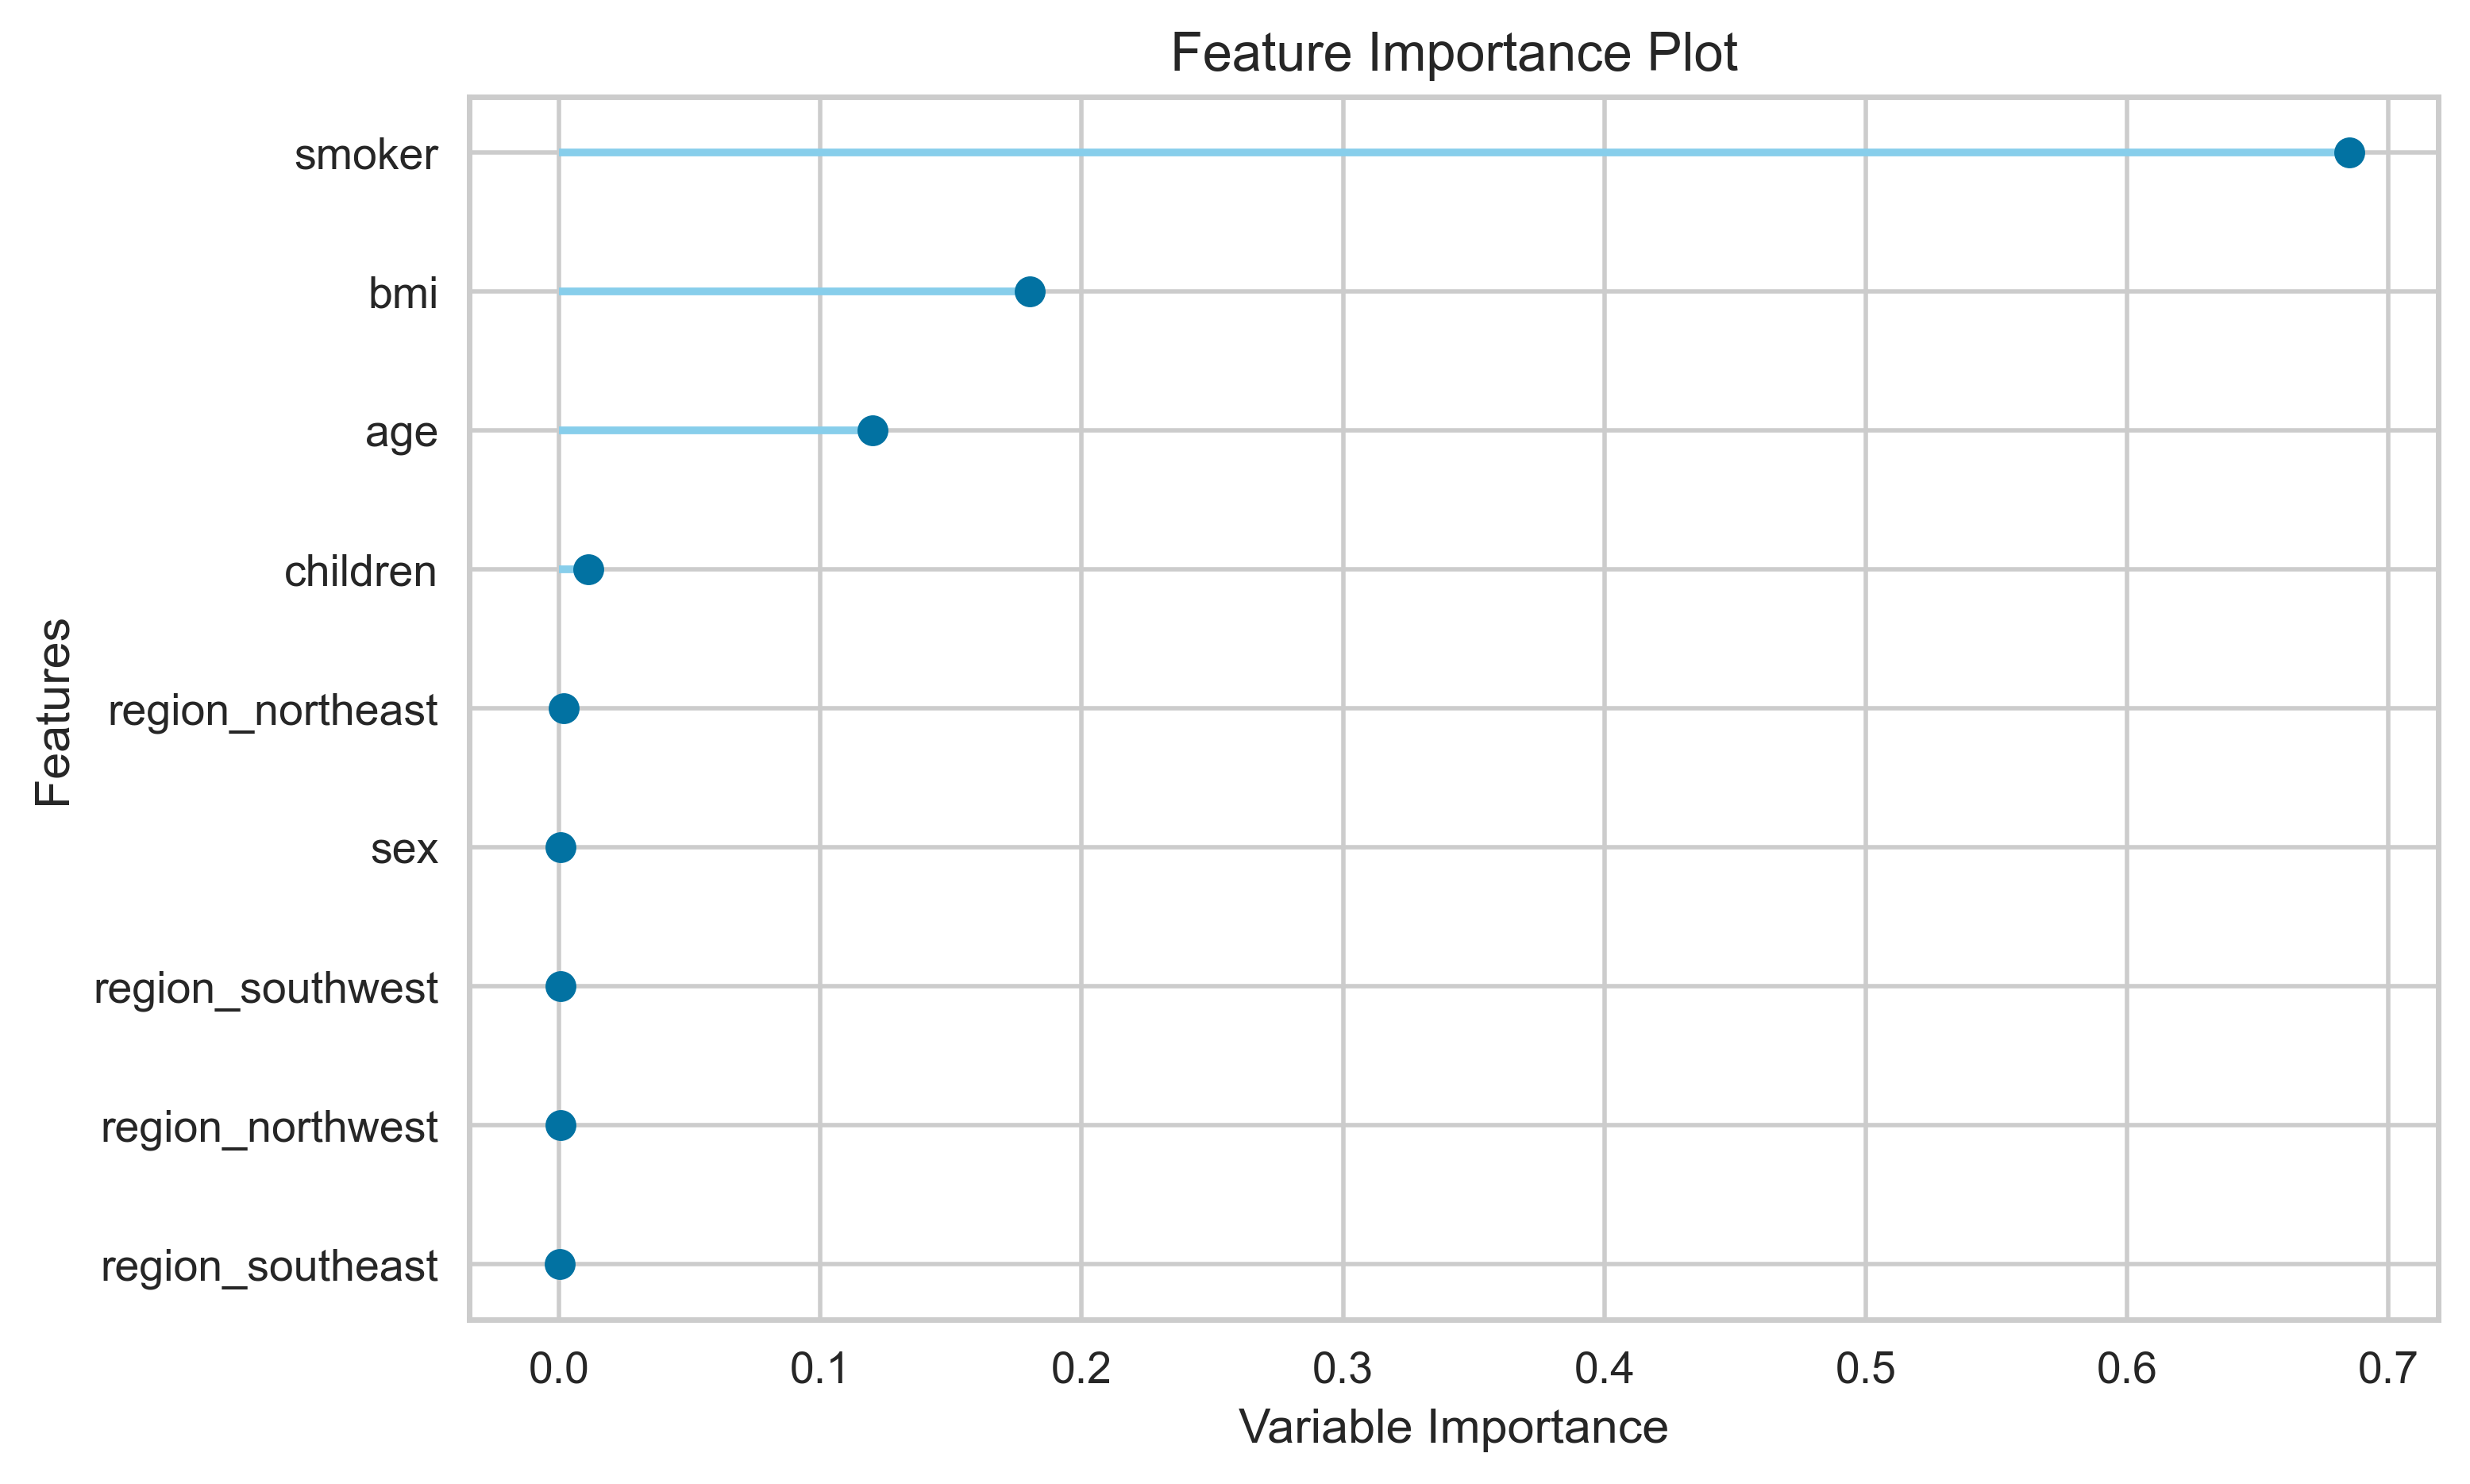

In [21]:
plot_model(tuned_model, 'feature', scale = 4)

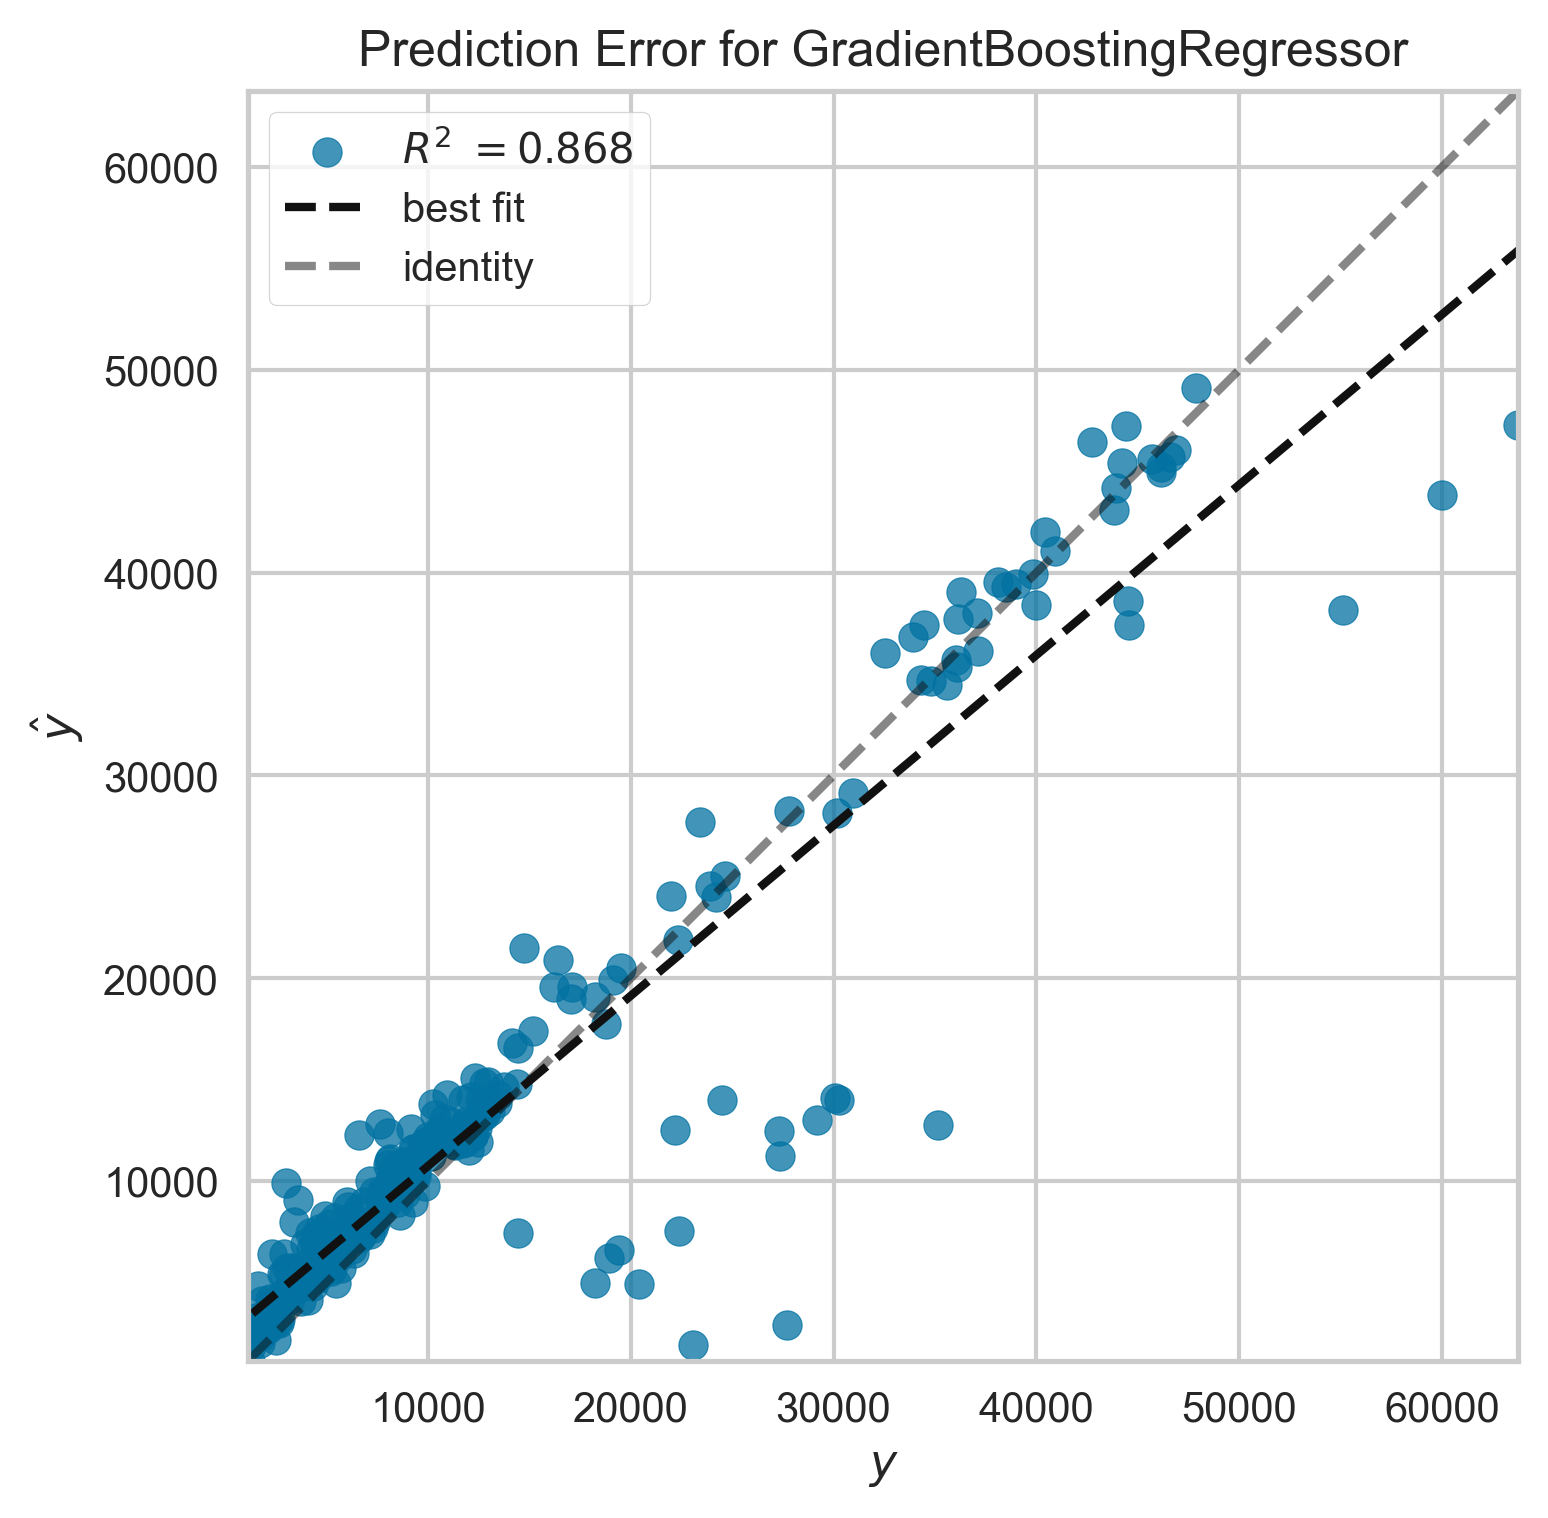

In [22]:
plot_model(model, 'error')

### Finalizing and Saving the Model

In [23]:
final_model = finalize_model(tuned_model)

save_model(final_model, 'regression_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\adity\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['smoker', 'sex', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerW...
                  TransformerWrapper(include=['region'],
                                     transformer=OneHotEncoder(cols=['region'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('nor